In [31]:
import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy
infinito = float('inf')   # definindo infinito


# Metodo de entrada de dados 1: Manualmente 
'''
# Nome dos nós, ex: ['A','B','C'...]
nos_ini = ['A','B','C','D','E','F','G','H','I']

# Arestas do grafo: [(Nó, Nó, Peso)]
arestas_ini = [('A','B', 4),('C','A', 8),('B','E', 8), ('B','C', 11),('C','D',7),
             ('D','E',2),('C','F',1),('D','F',6),('E','H',7),('E','G',4),
             ('F','G',2),('G','H',14),('H','I',9),('G','I',10)]

'''

# Metodo de entrada de daods 2: Utilizando um arquivo .graphml gerado no yEd, sendo que 
# todos os nó e arestas devem possuir labels. O peso da aresta é dado pelo seu label


# se o arquivo .graphml estiver no mesmodiretorio basta por o nome do arquivo.graphml

caminho = "apre.graphml"        # Variavel que  pega o caminho do grafo .graphml



#----------------------------------- Funções --------------------------------------------------------


#função que converte um arquivo .graphml do programa yed para dados para o programa
def converte_graphml(caminho_para_arquivo_graphml):
    grafo_externo = nx.read_graphml(caminho_para_arquivo_graphml)
    conv = nx.Graph() 
    nos_ini_conv = []
    no_conv_aux = []
    arestas_ini_conv = []

    for node, data in grafo_externo.nodes(data=True):      
        nos_ini_conv.append(data['label'])
        no_conv_aux.append(node)
        

    no_conv_aux = zip(nos_ini_conv, no_conv_aux)
    no_conv_aux = list(no_conv_aux)

    for u, v, data in grafo_externo.edges(data=True):
        for conv in no_conv_aux:
            if u == conv[1]:
                u = conv[0]
            if v == conv[1]:
                v = conv[0]
        aresta = (u,v,int(data['label']))
        arestas_ini_conv.append(aresta)   
    return(nos_ini_conv, arestas_ini_conv)

# Função de desenhar o grafo 
def desenha(grafo,pos):
    if pos == 0:
        pos = nx.spring_layout(grafo)
    nx.draw(grafo,pos, with_labels=True)
    grafo_labels = nx.get_edge_attributes(grafo,'peso')
    edges_label = nx.draw_networkx_edge_labels(grafo, pos, edge_labels = grafo_labels)
    return pos

#função que retorna as arestas que partem de um nó sem contar as que vão para nós fora da lista de prioridade
def explorador(nome_no):
    aresta_poss = []
    for are in arestas:
        if are[0] == nome_no or are[1] == nome_no:
            for no in lista_de_prioridade:
                if are[0] == no[0] or are[1] == no[0]:
                    aresta_poss.append(are)
    return aresta_poss

# função que retorna o nó de menos indico de prioridade
def menorPrioridade(lista):
    menor = infinito
    for i in lista:
        if i[1]['chave'] < menor:
            menor = i[1]['chave']
    for i in lista:
        if i[1]['chave'] == menor:
            return i
        
# função que retorna a aresta de menor peso        
def menorAresta(lista):
    menor = infinito
    for i in lista:
        if i[2]['peso'] <= menor:
            menor = i[2]['peso']
    for i in lista:
        if  i[2]['peso'] == menor:
            return i     

In [32]:


I = nx.Graph()
nos = []
arestas = []

nos_ini, arestas_ini = converte_graphml(caminho)   # nos_ini e aresta_ini serão formatados em nos e arestas

# Formata nó do grafo em: (Nome,{'chave': infinito, 'pai' :'NULL'})
for no in nos_ini:
    no = (no,{'chave': infinito, 'pai': 'NULL'})
    nos.append(no)

#nos = [('A', {'chave': infinito, 'pai': 'NULL'}), ('B', {'chave': infinito, 'pai': 'NULL'}), 
#       ('C', {'chave': infinito, 'pai': 'NULL'}), ('D', {'chave': infinito, 'pai': 'NULL'}), 
#       ('E', {'chave': infinito, 'pai': 'NULL'}), ('F', {'chave': infinito, 'pai': 'NULL'}), 
#       ('G', {'chave': infinito, 'pai': 'NULL'}), ('H', {'chave': infinito, 'pai': 'NULL'}), 
#       ('I', {'chave': infinito, 'pai': 'NULL'})]


# Formata Arestas do grafo em:(NÓ, NÓ, {'peso': X})
for are in arestas_ini:
    are = (are[0],are[1],{'peso': are[2]})
    arestas.append(are)
    
#arestas = [('A','B', {'peso': 4}),('C','A',{'peso':8}),('B','E',{'peso':8}),
#           ('B','C',{'peso':11}),('C','D',{'peso':7}),('D','E',{'peso':2}),
#           ('C','F',{'peso':1}),('D','F',{'peso':6}),('E','H',{'peso':7}),
#           ('E','G',{'peso':4}),('F','G',{'peso':2}),('G','H',{'peso':14}),
#           ('H','I',{'peso':9}),('G','I',{'peso':10})]



def remove_dups_for(lista):      #remove arestas identicas da lista
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    return l

arestas = remove_dups_for(arestas)

for  aresta in arestas:     
    if aresta[0] == aresta[1]:        # remove ciclos
         arestas.remove(aresta)
            
for aresta in arestas:               # remove arestas paralelas e mantem a de menor valor
    for outra in arestas:
        if aresta[0] == outra[1] and aresta[1] == outra[0]:
            if aresta[2]['peso'] > outra[2]['peso']:
                arestas.remove(aresta)
                
            if aresta[2]['peso'] == outra[2]['peso']:
                arestas.remove(outra)
                
        if aresta[0] == outra[0] and aresta[1] == outra[1]:
            if aresta[2]['peso'] > outra[2]['peso']:
                arestas.remove(aresta)
                

In [33]:

AGM = nx.Graph()                # novo grafo com arvore geradora minima
AGM_nos = []                    # lista de nos do grafo AGM
AGM_arestas = []                # lista de arestas do grafo AGM
possiveis = []          

lista_de_prioridade = deepcopy(nos) # todos os vertices na lista de prioridades
nos[0][1]['chave'] = 0              # inicializando primeiro nó com chave = 0 
nos[0][1]['pai'] = 'inicio'         # inicializando primeiro nó com pai = inicio

while lista_de_prioridade != []:
    menor_aresta = None
    no_analisado = menorPrioridade(lista_de_prioridade)    # nó com menor score
    lista_de_prioridade.remove(no_analisado)               # retira o nó analisado da lista
    AGM_nos.append(no_analisado)                           # guarda o nó com seu valor e pai 
    possiveis = possiveis + explorador(no_analisado[0])    # possiveis arestas
    menor_aresta = menorAresta(possiveis)
    for are in possiveis:
        for no in lista_de_prioridade:
            if no[0] == are[0]:
                if no[1]['chave'] > are[2]['peso']:
                    no[1]['chave'] = are[2]['peso']
                    no[1]['pai'] = are[1]
            if no[0] == are[1]:
                if no[1]['chave'] > are[2]['peso']:
                    no[1]['chave'] = are[2]['peso']
                    no[1]['pai'] = are[0]
    possiveis = []

for no in AGM_nos:
    if no[1]['pai'] != 'NULL':
        agmaresta = (no[1]['pai'], no[0], {'peso': no[1]['chave']})
        AGM_arestas.append(agmaresta)

I.add_nodes_from(nos)
I.add_edges_from(arestas)
        
AGM.add_nodes_from(AGM_nos)      # coloca os nós da lista no grafo
AGM.add_edges_from(AGM_arestas)

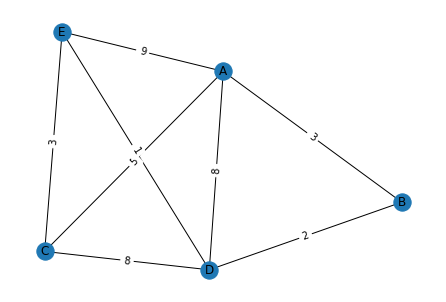

In [34]:
pos = desenha(I,0)          # desenha o grafo inicial sem arestas paralelas e loops

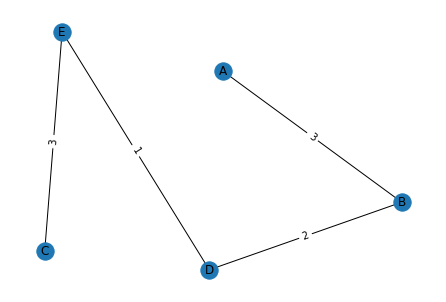

In [35]:
res = desenha(AGM,pos)           # desenha o grafo AGM